<a href="https://colab.research.google.com/github/webjjang/data_anal/blob/main/ch06_high.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
# 코랩에서 실행될 때 코랩의 리눅스 시스템에 처리 - 글꼴 등록
if "google.colab" in sys.modules:
    print("구글 코랩에서 실행 중입니다.")
    # 리눅스 확인
    !echo "debconf debconf/frontend select Noninteractive" | \
    debconf-set-selections
    # 나눔 폰트를 설치합니다.
    # 리눅스 처리문 - 관리자 권한 처리 : sudo
    # apt-get : 패키지 관리 명령
    # -qq : 진행 상황 최소 출력. -y : yes/no 를 물어 보면 yes로 처리해라.
    !sudo apt-get -qq -y install fonts-nanum
    # 폰트 세팅을 위해 필요한 라이브러리 import
    import matplotlib.font_manager as fm
    # 폰트 설치 진행
    font_files = fm.findSystemFonts(fontpaths=["/usr/share/fonts/truetype/nanum"])
    for fpath in font_files:
      fm.fontManager.addfont(fpath)


구글 코랩에서 실행 중입니다.
Selecting previously unselected package fonts-nanum.
(Reading database ... 126332 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt

# 나눔바른 고딕 폰트로 설정
plt.rc("font", family="NanumBarunGothic")

# 그래프 DPI 기본 값을 변경
plt.rcParams["figure.dpi"] = 100

In [ ]:
# 작업할 데이터 준비
import gdown
gdown.download("https://bit.ly/3pK7iuu","ns_book7.csv",quiet=False)
import pandas as pd
ns_book7 = pd.read_csv("ns_book7.csv", low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 125MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [ ]:
# 하나의 피겨에 여러개의 선 그래프 그리기
# 출판사 이름이 가장 많이 나타나는 상위 30개의 데이터
top30_pubs = ns_book7["출판사"].value_counts()[:30]
top30_pubs_idx = ns_book7["출판사"].isin(top30_pubs.index)
ns_book9 = ns_book7[top30_pubs_idx][["출판사", "발행년도", "대출건수"]]
ns_book9 = ns_book9.groupby(by=["출판사", "발행년도"]).sum()
ns_book9 = ns_book9.reset_index()
ns_book9[ns_book9["출판사"] == "황금가지"].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


In [ ]:
line1 = ns_book9[ns_book9["출판사"] == "황금가지"]
line2 = ns_book9[ns_book9["출판사"] == "비룡소"]


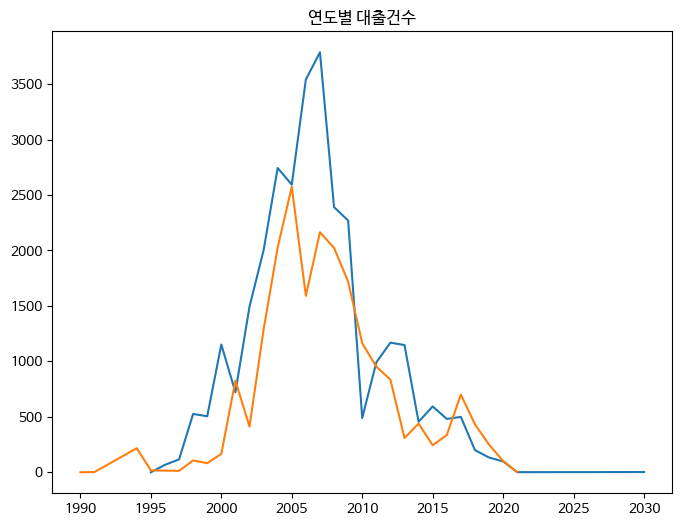

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1["발행년도"], line1["대출건수"])
ax.plot(line2["발행년도"], line2["대출건수"])
ax.set_title("연도별 대출건수")
fig.show()

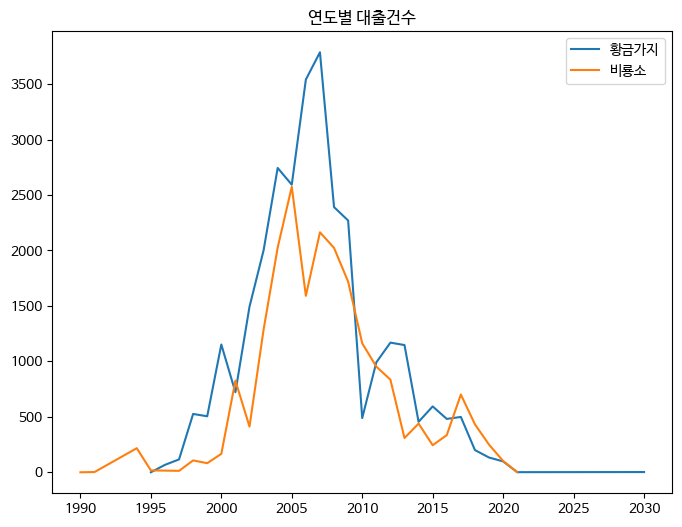

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1["발행년도"], line1["대출건수"], label="황금가지")
ax.plot(line2["발행년도"], line2["대출건수"], label="비룡소")
ax.set_title("연도별 대출건수")
ax.legend()
fig.show()

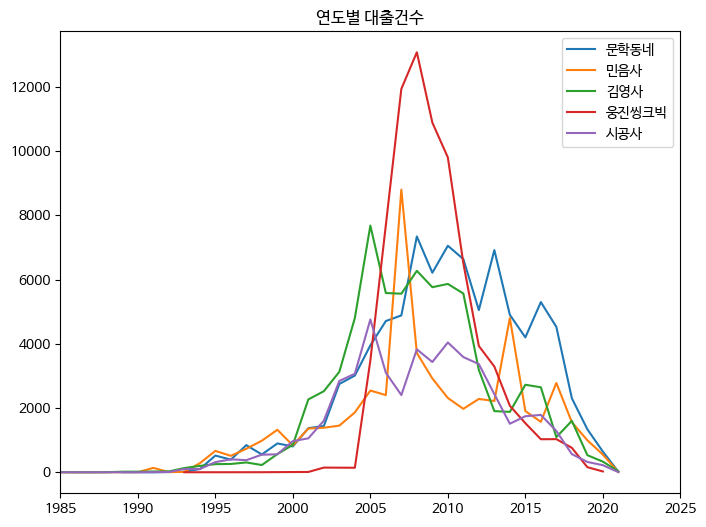

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:5]:
    line = ns_book9[ns_book9["출판사"] == pub]
    ax.plot(line["발행년도"], line["대출건수"], label=pub)
ax.set_title("연도별 대출건수")
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()

In [ ]:
ns_book10 = ns_book9.pivot_table(index="출판사", columns="발행년도")
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [ ]:
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

In [ ]:
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)

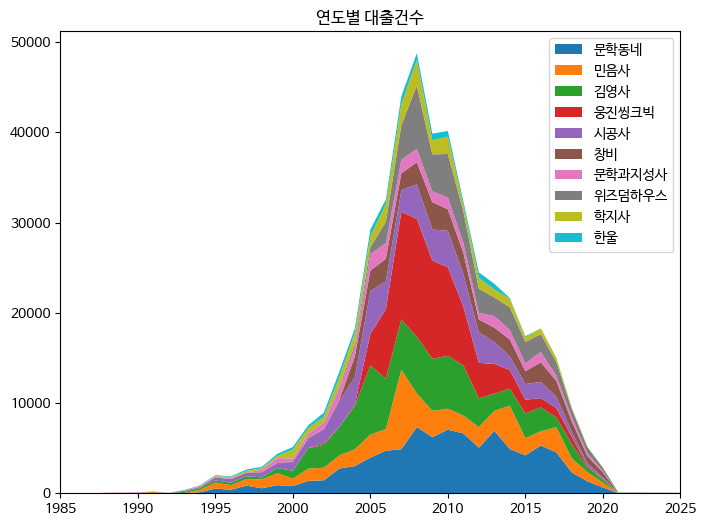

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title("연도별 대출건수")
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()

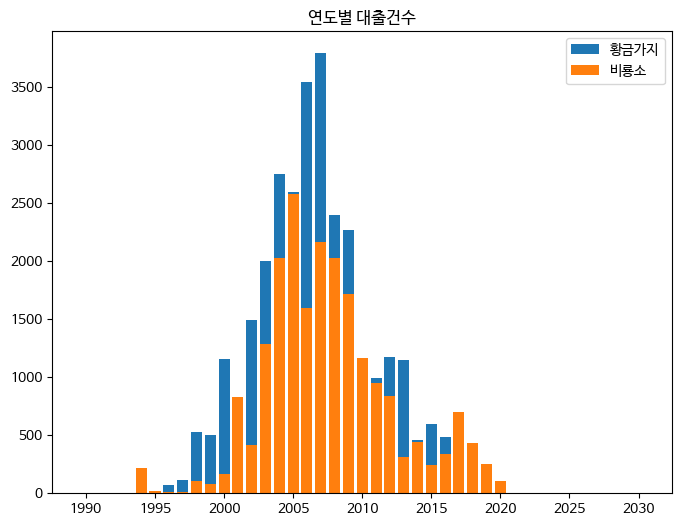

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1["발행년도"], line1["대출건수"], label="황금가지")
ax.bar(line2["발행년도"], line2["대출건수"], label="비룡소")
ax.set_title("연도별 대출건수")
ax.legend()
fig.show()

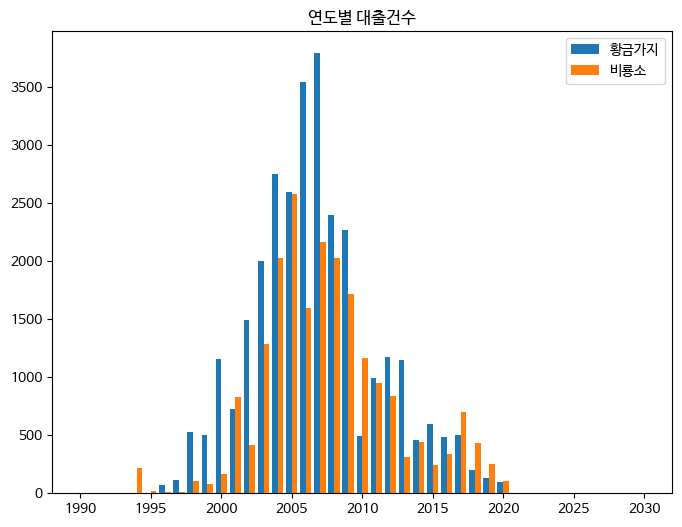

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1["발행년도"]-0.2, line1["대출건수"], width=0.4, label="황금가지")
ax.bar(line2["발행년도"]+0.2, line2["대출건수"], width=0.4, label="비룡소")
ax.set_title("연도별 대출건수")
ax.legend()
fig.show()